### Import Library

In [1]:
from __future__ import division
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Model Prediction

In [2]:
from sklearn.preprocessing import StandardScaler
# Mengambil data fitur CSV ke dalam DataFrame
csv_filename = 'hsv_final_features.csv'
df = pd.read_csv(csv_filename)

# Pisahkan label dan fitur
X = df[['Mean_Hue', 'Mean_Saturation', 'Mean_Value']]
y = df['Class']

# Memisahkan dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat objek SVM classifier
svm_classifier = SVC(kernel = 'rbf', C = 1.0, probability=True)  # You can adjust kernel, gamma, and C parameters as needed

# melatih model SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(probability=True)

### Evaluation

Confusion Matrix:
[[33  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 33  0  1]
 [ 7  1  0 24  0]
 [ 0  0  0  0 33]]


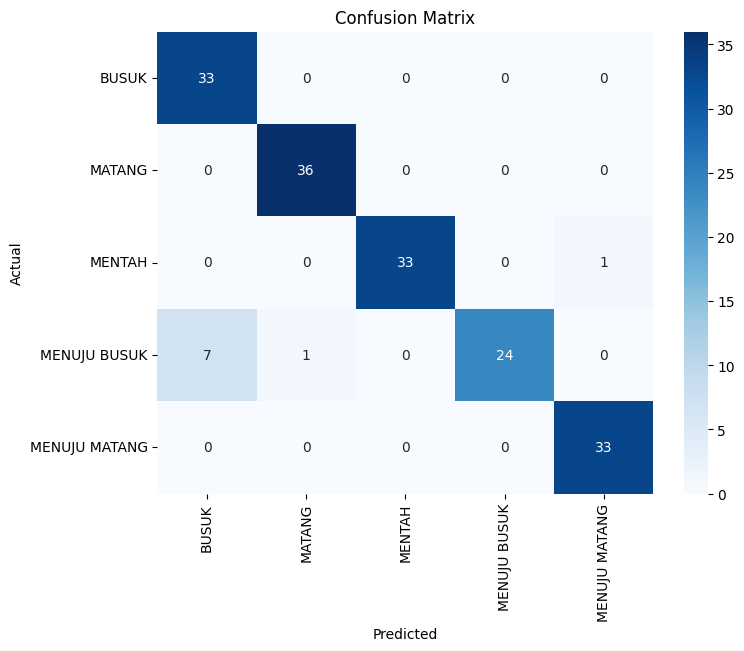

Accuracy: 94.64%
Precision: 95.41%
Recall: 94.64%
F1 Score: 94.51%


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi dalam test set
y_pred_svm = svm_classifier.predict(X_test)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Melakukan visualisasi confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = svm_classifier.classes_, yticklabels = svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menghitung nilai accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {svm_accuracy * 100:.2f}%')

# Menghitung nilai precision, recall, dan F1 score
precision = precision_score(y_test, y_pred_svm, average = 'weighted')
recall = recall_score(y_test, y_pred_svm, average = 'weighted')
f1 = f1_score(y_test, y_pred_svm, average = 'weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


In [4]:
model_filename = 'SVM_model.pkl'
joblib.dump(svm_classifier, model_filename)

print(f"SVM model saved to {model_filename}")

SVM model saved to SVM_model.pkl
